# Yelp Data Challenge - Restaurant Recommender

BitTiger DS501

Sep 2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('last_2_years_restaurant_reviews_from_else.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,52,2016-09-25,30,6eUT3IwwWPP3CZkAhxqOIw,5,"One word my friends: tableside!!! Yes, tablesi...",56,7RlyCglsIzhBn081inwvcg
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2017-02-12,0,3cnTdE45VrsS0o4cVhfGog,3,"Located inside my favorite hotel Venetian, Del...",1,rOIrilMC7VFwFVBeQNiKMw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2016-10-30,0,tYrSbjX3QgZGBZuQ3n8g6w,5,"After the most incredible service, delicious m...",2,PiWlV_UC_-SXqyxQM9fAtw


## 1. Clean data and get rating data 

#### Select relevant columns in the original dataframe

In [3]:
# Get business_id, user_id, stars for recommender

df_stars=df[['business_id','user_id','stars']]

In [4]:
df_stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437640 entries, 0 to 437639
Data columns (total 3 columns):
business_id    437640 non-null object
user_id        437640 non-null object
stars          437640 non-null int64
dtypes: int64(1), object(2)
memory usage: 10.0+ MB


In [6]:
df_stars.head()

,business_id,user_id,stars
0,--9e1ONYQuAa-CB_Rrw7Tw,4LxKRRIikhr65GfPDW626w,5
1,--9e1ONYQuAa-CB_Rrw7Tw,nT8zgjoc-PbdBoQsFEXFLw,5
2,--9e1ONYQuAa-CB_Rrw7Tw,7RlyCglsIzhBn081inwvcg,5
3,--9e1ONYQuAa-CB_Rrw7Tw,rOIrilMC7VFwFVBeQNiKMw,3
4,--9e1ONYQuAa-CB_Rrw7Tw,PiWlV_UC_-SXqyxQM9fAtw,5


In [7]:
# stars distribution
df_stars['stars'].value_counts()

5    200211
4     95171
1     55408
3     49707
2     37143
Name: stars, dtype: int64

In [8]:
# number of unique business_id
df_stars['business_id'].nunique() # number of unique elements

4624

In [9]:
# number of unique user_id
df_stars['user_id'].nunique()

195802

In [5]:
df_user_counts=df_stars['user_id'].value_counts()
df_user_counts.head()

bLbSNkLggFnqwNNzzq-Ijw    681
JaqcCU3nxReTW2cBLHounA    296
PKEzKWv_FktMm2mGPjwd0Q    248
B1829_hxXSEpDPEDJtYeIw    242
U4INQZOPSUaj8hMjLlZ3KA    205
Name: user_id, dtype: int64

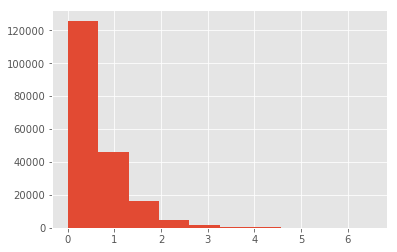

In [6]:
# display log histogram
df_user_counts.apply(np.log).hist()
plt.show()

#### There are many users that haven't given many reviews, exclude these users from the item-item similarity recommender

**Q**: How do we recommend to these users anyways?

In [7]:
# To be implemented
# how many users only comments once
df_user_counts[df_user_counts==1].shape

(125823L,)

In [8]:
# users comment over 5 times
df_users=df_user_counts[df_user_counts>5]


In [14]:
# count users comment over 5 times as active user
df_users.count()

12257

In [15]:
# sum of all comments
df_users.sum()

154399L

In [16]:
# display active user id
df_users.index

Index([u'bLbSNkLggFnqwNNzzq-Ijw', u'JaqcCU3nxReTW2cBLHounA',
       u'PKEzKWv_FktMm2mGPjwd0Q', u'B1829_hxXSEpDPEDJtYeIw',
       u'U4INQZOPSUaj8hMjLlZ3KA', u'3nIuSCZk5f_2WWYMLN7h3w',
       u'qPVtjjp8sNQ32p9860SR9Q', u'OXSJCjKtvZPf-YPDCXcWZg',
       u'VigsAph76fP7pechJ743EA', u'JYcCYNWs8Ul6ewG5kCYW4Q',
       ...
       u'fAzjDvUAk8BHqHi5fy1znQ', u'pjg0FxLooOTl3-l1CQ-UWQ',
       u'7zDpmNhAONf-viIsQDHDVA', u'k8okFWX0acPR8c4L7XM55A',
       u'N3oNEwh0qgPqPP3Em6wJXw', u'vZBG3iWGvvsxG40QZPSRIQ',
       u'aA-kQeG86xMsxjKgF14pcQ', u'fqTA37Z9SEST-4i0fom-XQ',
       u'buBocJ5JvDQ-83CS5IpuwQ', u'qxZZByWgME5rJf7e-yLBXA'],
      dtype='object', length=12257)

In [17]:
df_stars.head()

,business_id,user_id,stars
0,--9e1ONYQuAa-CB_Rrw7Tw,4LxKRRIikhr65GfPDW626w,5
1,--9e1ONYQuAa-CB_Rrw7Tw,nT8zgjoc-PbdBoQsFEXFLw,5
2,--9e1ONYQuAa-CB_Rrw7Tw,7RlyCglsIzhBn081inwvcg,5
3,--9e1ONYQuAa-CB_Rrw7Tw,rOIrilMC7VFwFVBeQNiKMw,3
4,--9e1ONYQuAa-CB_Rrw7Tw,PiWlV_UC_-SXqyxQM9fAtw,5


In [18]:
df_stars.set_index('user_id').ix[df_users.index].head()

C:\Users\Lei Lei\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,business_id,stars
user_id,,
bLbSNkLggFnqwNNzzq-Ijw,-BS4aZAQm9u41YnB9MUASA,4
bLbSNkLggFnqwNNzzq-Ijw,-C8sSrFqaCxp51pyo-fQLQ,4
bLbSNkLggFnqwNNzzq-Ijw,-CQokjildrY7UZezXCdEBw,5
bLbSNkLggFnqwNNzzq-Ijw,-FcZY7a7qgxTUlTvwuyJnQ,3
bLbSNkLggFnqwNNzzq-Ijw,-IWsoxH7mLJTTpU5MmWY4w,4


In [9]:
df_stars_cleaned=df_stars.set_index('user_id').ix[df_users.index].reset_index()



C:\Users\Lei Lei\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [10]:
df_stars.head()

,business_id,user_id,stars
0,--9e1ONYQuAa-CB_Rrw7Tw,4LxKRRIikhr65GfPDW626w,5
1,--9e1ONYQuAa-CB_Rrw7Tw,nT8zgjoc-PbdBoQsFEXFLw,5
2,--9e1ONYQuAa-CB_Rrw7Tw,7RlyCglsIzhBn081inwvcg,5
3,--9e1ONYQuAa-CB_Rrw7Tw,rOIrilMC7VFwFVBeQNiKMw,3
4,--9e1ONYQuAa-CB_Rrw7Tw,PiWlV_UC_-SXqyxQM9fAtw,5


In [21]:
# reorder dataframe
df_stars_cleaned.head()

,user_id,business_id,stars
0,bLbSNkLggFnqwNNzzq-Ijw,-BS4aZAQm9u41YnB9MUASA,4
1,bLbSNkLggFnqwNNzzq-Ijw,-C8sSrFqaCxp51pyo-fQLQ,4
2,bLbSNkLggFnqwNNzzq-Ijw,-CQokjildrY7UZezXCdEBw,5
3,bLbSNkLggFnqwNNzzq-Ijw,-FcZY7a7qgxTUlTvwuyJnQ,3
4,bLbSNkLggFnqwNNzzq-Ijw,-IWsoxH7mLJTTpU5MmWY4w,4


In [17]:
df_stars_cleaned.shape

(154399, 3)

#### Create utility matrix from records

In [11]:
# To be implemented

# convert to document, word like matrix
df_utility=pd.pivot_table(data=df_stars_cleaned,
                         values='stars', # fill with stars
                         index='user_id', #rows
                         columns='business_id',#columns
                         fill_value=0 )# fill missings

In [12]:
df_utility.head()

business_id,--9e1ONYQuAa-CB_Rrw7Tw,-1vfRrlnNnNJ5boOVghMPA,-3zffZUHoY8bQjGfPSoBKQ,-8R_-EkGpUhBk55K9Dd4mg,-9YyInW1wapzdNZrhQJ9dg,-AD5PiuJHgdUcAK-Vxao2A,-BS4aZAQm9u41YnB9MUASA,-Bf8BQ3yMk8U2f45r2DRKw,-BmqghX1sv7sgsxOIS2yAg,-Bv-HHUs8aHzDrdWcZHn8w,...,zmltWmTpoBt5sCU-5Kzj-Q,znWHLW1pt19HzW1VY6KfCA,zp-K5s3pGTWuuaVBWo6WZA,zpoZ6WyQUYff18-z4ZU1mA,zrQ1zKWC-W2PCvwjBururQ,zsQk990PubOHjr1YcLkQFw,zt9RLUIU32fZYOBh2L0NNQ,zttcrQP4MxNS5X5itzStXg,zuwba6QEBIDZT0tJZmNhdQ,zwNC-Ow4eIMan2__bS9-rg
user_id,,,,,,,,,,,,,,,,,,,,,
--LUapetRSkZpFZ2d-MXLQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--RlSfc-QmcHFGHyX6aVjA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--ZNfWKj1VyVElRx6-g1fg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
-00kdEIhCt-ODaV4BS-EAg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-05XqtNjcBq19vh2CVJN8g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# get the list of user id by checking out the index of the utility matrix
user_id_list=df_utility.index
user_id_list.shape

(12257L,)

In [14]:
# get the list of item id by checking out the columns of the utility matrix
item_id_list=df_utility.columns
item_id_list.shape

(4343L,)

## recommendation system with graphlab

In [15]:
import graphlab

In [27]:
graphlab.get_dependencies()


By running this function, you agree to the following licenses.

* libstdc++: https://gcc.gnu.org/onlinedocs/libstdc++/manual/license.html
* xz: http://git.tukaani.org/?p=xz.git;a=blob;f=COPYING
    
Extracting xz.
Extracting gcc-libs.
Copying gcc-libs into the installation directory.


## 2. Item-Item similarity recommender

### Let's reuse the ItemItemRecommender class derived from previous exercise

Hint: we need to make modification to accommodate the dense numpy array

In [16]:
# To be implemented

sf_stars = graphlab.SFrame(df_stars)
sf_stars # SFrame similar to DataFrame

This non-commercial license of GraphLab Create for academic use is assigned to leilei9933@gmail.com and will expire on February 23, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\LEILEI~1\AppData\Local\Temp\graphlab_server_1519436906.log.0


business_id,user_id,stars
--9e1ONYQuAa-CB_Rrw7Tw,4LxKRRIikhr65GfPDW626w,5
--9e1ONYQuAa-CB_Rrw7Tw,nT8zgjoc-PbdBoQsFEXFLw,5
--9e1ONYQuAa-CB_Rrw7Tw,7RlyCglsIzhBn081inwvcg,5
--9e1ONYQuAa-CB_Rrw7Tw,rOIrilMC7VFwFVBeQNiKMw,3
--9e1ONYQuAa-CB_Rrw7Tw,PiWlV_UC_-SXqyxQM9fAtw,5
--9e1ONYQuAa-CB_Rrw7Tw,TU5j2S_Ub__ojLOpD_UepQ,5
--9e1ONYQuAa-CB_Rrw7Tw,yywpv3b6QWWJzjOyIlvWiQ,3
--9e1ONYQuAa-CB_Rrw7Tw,4pbbNuzxlZ9E52wsVhgGig,1
--9e1ONYQuAa-CB_Rrw7Tw,KZoC3XF8kaOfXCRmA5rOcA,5
--9e1ONYQuAa-CB_Rrw7Tw,ez3GBw83OIgzzgvc0R4jzw,4


In [18]:
# item-item recommender
item_item_rec=graphlab.recommender.item_similarity_recommender.create(sf_stars,
                                                                     user_id='user_id',
                                                                     item_id='business_id',
                                                                     target='stars')

Recsys training: model = item_similarity

Preparing data set.

Data has 437640 observations with 195802 users and 4624 items.

Data prepared in: 0.493804s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 43.602ms                       | 6.5        |

| 43.602ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 101.803ms                           | 0                | 0               |

| 284.814ms                           | 100              | 4624            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.33446s

In [19]:
item_item_rec_result=item_item_rec.recommend(k=3,verbose=False)
item_item_rec_result

user_id,business_id,score,rank
4LxKRRIikhr65GfPDW626w,faPVqws-x-5k2CQKDNtHxw,0.0106560587883,1
4LxKRRIikhr65GfPDW626w,-wCtRhzWJ40Z4F8mmg7kWg,0.00753258913755,2
4LxKRRIikhr65GfPDW626w,7UFDAX4wLi6ux5otguYldA,0.0072423145175,3
nT8zgjoc-PbdBoQsFEXFLw,SeNOJ2zYHziptxLuiRINLg,0.00921416282654,1
nT8zgjoc-PbdBoQsFEXFLw,rcaPajgKOJC2vo_l3xa42A,0.00815848509471,2
nT8zgjoc-PbdBoQsFEXFLw,pmoIMK8zGWvKsVOPDBYfzg,0.00813007354736,3
7RlyCglsIzhBn081inwvcg,H8qpFitIesth86zqR4cwYg,0.0157702763875,1
7RlyCglsIzhBn081inwvcg,Yp9w4nhUowBU_IS_StFXbQ,0.0134044686953,2
7RlyCglsIzhBn081inwvcg,rcaPajgKOJC2vo_l3xa42A,0.010878721873,3
rOIrilMC7VFwFVBeQNiKMw,RESDUcs7fIiihp38-d6_6g,0.0175849050283,1


# 3. Content-based recommender

### extract some feature for recommender

In [22]:
# group by business_id, then average numerical features
df_average=df.groupby(['business_id']).mean()
df_average.head()

,avg_stars,cool,funny,stars,useful
business_id,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.0,0.690176,0.521411,4.141058,0.959698
-1vfRrlnNnNJ5boOVghMPA,3.0,0.357143,0.428571,3.000000,0.357143
-3zffZUHoY8bQjGfPSoBKQ,4.0,0.503145,0.440252,3.880503,0.943396
-8R_-EkGpUhBk55K9Dd4mg,3.5,0.877551,0.775510,3.714286,1.000000
-9YyInW1wapzdNZrhQJ9dg,2.5,0.162162,0.229730,2.378378,0.608108


In [62]:
# group by business_id, extract categories data
categories_series=df.groupby(['business_id']).categories.apply(np.unique)
categories_series.head()

business_id
--9e1ONYQuAa-CB_Rrw7Tw     [['Steakhouses', 'Cajun/Creole', 'Restaurants']]
-1vfRrlnNnNJ5boOVghMPA            [['Restaurants', 'Korean', 'Sushi Bars']]
-3zffZUHoY8bQjGfPSoBKQ    [['Seafood', 'Bars', 'Nightlife', 'American (N...
-8R_-EkGpUhBk55K9Dd4mg                            [['Restaurants', 'Thai']]
-9YyInW1wapzdNZrhQJ9dg                         [['Buffets', 'Restaurants']]
Name: categories, dtype: object

In [42]:
type(categories_series)

pandas.core.series.Series

In [63]:
# convert categories data to string remove `[]`
categories_series=categories_series.str.join('').apply(lambda x: x[1:-1])
categories_series.head()

business_id
--9e1ONYQuAa-CB_Rrw7Tw         'Steakhouses', 'Cajun/Creole', 'Restaurants'
-1vfRrlnNnNJ5boOVghMPA                'Restaurants', 'Korean', 'Sushi Bars'
-3zffZUHoY8bQjGfPSoBKQ    'Seafood', 'Bars', 'Nightlife', 'American (New...
-8R_-EkGpUhBk55K9Dd4mg                                'Restaurants', 'Thai'
-9YyInW1wapzdNZrhQJ9dg                             'Buffets', 'Restaurants'
Name: categories, dtype: object

In [64]:
# business_id, categories table
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
categories_mat=vectorizer.fit_transform(categories_series).toarray()
categories=vectorizer.get_feature_names()


In [65]:
categories_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
df_categories=pd.DataFrame(categories_mat,columns=categories,index=categories_series.index)
df_categories.head()

,acai,active,activities,acupuncture,adult,afghan,african,air,aircraft,airport,...,wholesalers,windshield,wine,wineries,wings,women,wraps,yoga,yogurt,yourself
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1vfRrlnNnNJ5boOVghMPA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-3zffZUHoY8bQjGfPSoBKQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-8R_-EkGpUhBk55K9Dd4mg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-9YyInW1wapzdNZrhQJ9dg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Matrix Factorization recommender

Take a look at Graphlab Create examples

## 4. Other recommenders (optional)

What are other ways you can build a better recommender?

* Other features (have you noticed there are other features in the Yelp dataset, e.g. tips, etc.?)
* Popularity-based
* Content-based
* Hybrid